In [1]:
import tensorflow as tf
tf.random.set_seed(0)

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras import layers, datasets, models, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import os
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

import random
random.seed(0)

In [2]:
def read_data(filepath):
    dataset = image_dataset_from_directory(
        filepath,
        image_size=(224, 224),
        batch_size=32,
        label_mode='int'
    )
    
    images = []
    labels = []
    for image_batch, label_batch in dataset:
        images.append(image_batch.numpy())
        labels.append(label_batch.numpy())
    
    # Chuyển đổi danh sách thành mảng numpy bằng cách dùng np.concatenate
    X = np.concatenate(images, axis=0).astype(np.uint8)
    y = np.concatenate(labels, axis=0).astype(np.uint8)
    
    return X, y

In [3]:
classes = ["apple", "avocado", "banana", "cherry", "kiwi", "mango", "orange", "pinenaple", "strawberries", "watermelon"]
len(classes)

10

In [4]:
X, y = read_data('train')
X_test, y_test = read_data('test')

Found 2301 files belonging to 10 classes.
Found 1025 files belonging to 10 classes.


In [5]:
X.shape, y.shape, X_test.shape, y_test.shape

((2301, 224, 224, 3), (2301,), (1025, 224, 224, 3), (1025,))

In [6]:
X = X.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [7]:
y = keras.utils.to_categorical(y)
y_test = keras.utils.to_categorical(y_test)

In [8]:
X_val, y_val = X[1900:2301,:, :], y[1900:2301,:]
X_train, y_train = X[:1900, :, :], y[:1900, :]

In [9]:
# Xây dựng model
input_tensor = Input(shape = (224, 224, 3))
x = Conv2D(32, 3, activation = 'relu')(input_tensor)
x = Conv2D(32, 3, activation = 'relu')(x)
x = Dropout(0.5)(x)

x = MaxPooling2D(2)(x)
x = Flatten()(x)

# FC
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = models.Model(inputs = input_tensor, outputs = x)

In [10]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 220, 220, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 387200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      49,561,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,573,162 (189.11 MB)

 Trainable params: 49,573,162 (189.11 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
H = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 10, verbose=1)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 58s 879ms/step - accuracy: 0.1141 - loss: 15.7743 - val_accuracy: 0.1546 - val_loss: 2.2563
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 814ms/step - accuracy: 0.1621 - loss: 2.2119 - val_accuracy: 0.1820 - val_loss: 2.0945
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 827ms/step - accuracy: 0.2452 - loss: 2.0151 - val_accuracy: 0.2419 - val_loss: 2.0065
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 817ms/step - accuracy: 0.3252 - loss: 1.8697 - val_accuracy: 0.2569 - val_loss: 1.9181
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 829ms/step - accuracy: 0.4337 - loss: 1.5983 - val_accuracy: 0.3441 - val_loss: 1.7069
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5911 - loss: 1.1812 - val_accuracy: 0.3067 - val_loss: 1.8471
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 839ms/step - accuracy: 0.7051 - loss: 0.8943 - val_accuracy: 0.3741 - val_loss: 1.7982
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 818ms/step - accuracy: 0.8127 - loss: 0.6081 - val_accura

In [21]:
score = model.evaluate(X_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.4390 - loss: 1.6943


In [22]:
score

[1.7083450555801392, 0.4439024329185486]

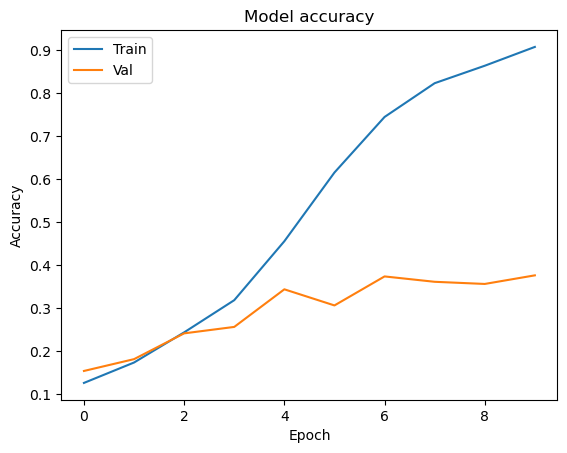

In [23]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [24]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))
    
    len_x = x_data.shape[0]
    
    for i in range(nrows * ncols):
        ax = axes[i // ncols, i % ncols]
        
        img_index = random.randint(0, len_x)
        
        ax.imshow(x_data[img_index])
        ax.set(xticks=[], yticks=[])
        
        true_label_str = 'Dự đoán: ' + classes[y_data[img_index]]
        ax.set_xlabel(true_label_str, color='green', fontsize = 12)
    plt.tight_layout()
    plt.show()

In [25]:
image_paths = [os.path.join('predict/', f) for f in os.listdir('predict/') if f.endswith(".jpeg")]

# Đọc ảnh thành tensor
def read_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)  # Giải mã ảnh JPEG thành tensor 3 kênh (RGB)
    image = tf.image.resize(image, (224, 224))  # Thay đổi kích thước ảnh (tùy chọn)
    image = tf.cast(image, tf.float32) / 255.0  # Chuẩn hóa giá trị pixel
    return image

# Tạo tập dữ liệu tensor
dataset = tf.data.Dataset.from_tensor_slices(image_paths)
dataset = dataset.map(read_image)

# Chuyển đổi tập dữ liệu thành numpy array
X_predict = []
for image_tensor in dataset:
    X_predict.append(image_tensor.numpy())
    
X_predict = np.array(X_predict)

In [26]:
y_predict = model.predict(X_predict)
predicted_classes = np.argmax(y_predict, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


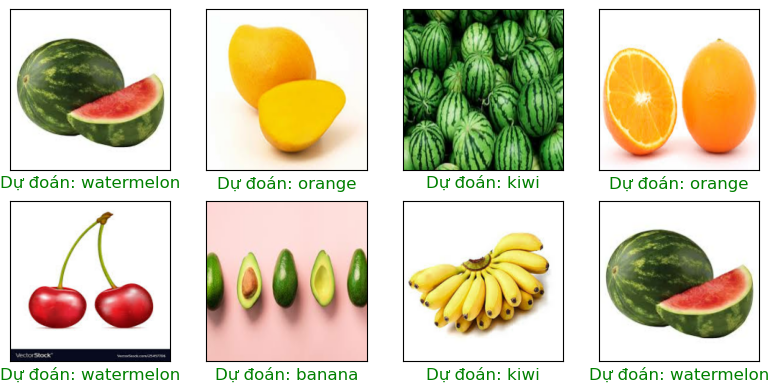

In [28]:
plot_data(X_predict, predicted_classes)